# Project Understending

O câncer de mama é uma das principais causas de morte em mulheres em todo o mundo. A detecção precoce é fundamental para aumentar as chances de sobrevivência e a qualidade de vida dos pacientes. Neste projeto, nosso objetivo é desenvolver um modelo de aprendizado profundo que possa prever se um tumor de mama é benigno ou maligno com base em várias características do tumor.

Os dados que estamos usando para este projeto vêm do conjunto de dados de câncer de mama do Wisconsin, disponível no Kaggle. Este conjunto de dados inclui informações sobre várias características do tumor, como o raio médio, a textura média, o perímetro médio, a área média, a suavidade média, entre outras. A coluna ‘diagnosis’ é nosso alvo, que estamos tentando prever com base nessas características. As categorias possíveis para o diagnóstico são ‘M’ para maligno e ‘B’ para benigno.

# Setup


In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import json

# Bibliotecas do Keras para construção do modelo de Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from sklearn.feature_selection import SelectKBest, f_classif

# Biblioteca para pré-processamento dos dados
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# Biblioteca para avaliação do modelo
from sklearn.metrics import confusion_matrix, accuracy_score

# Deploy
from keras.models import load_model

In [2]:
df = pd.read_csv(r'..\assets\data.csv')

# Exibe as primeiras linhas do DataFrame
df.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,compactness_worst.1,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


# Data Understending

Sobre o Conjunto de Dados As características são calculadas a partir de uma imagem digitalizada de um aspirado com agulha fina (FNA) de uma massa mamária. Elas descrevem características dos núcleos celulares presentes na imagem. O espaço tridimensional é descrito em: [K. P. Bennett e O. L. Mangasarian: “Robust Linear Programming Discrimination of Two Linearly Inseparable Sets”, Optimization Methods and Software 1, 1992, 23-34].

Este banco de dados também está disponível através do servidor ftp da UW CS: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Também pode ser encontrado no Repositório de Aprendizado de Máquina da UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

***Dez características de valor real são calculadas para cada núcleo celular:***

-   Número de identificação:
**Diagnóstico (M = maligno, B = benigno) 3-32)**


- raio (média das distâncias do centro aos pontos no perímetro) 
-  textura (desvio padrão dos valores em escala de cinza) 
-  perímetro 
-  área 
-  suavidade (variação local nos comprimentos do raio) 
-  compactação (perímetro^2 / área - 1,0) 
-  concavidade (gravidade das partes côncavas do contorno) 
-  pontos côncavos (número de partes côncavas do contorno) 
-  simetria 
-  dimensão fractal (“aproximação da linha costeira” - 1)



# Data Preparation

In [3]:
# Verificando se há valores nulos
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concavepoints_mean           0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
compactness_worst.1          0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concavepoints_mean       569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Codificando a coluna 'diagnosis' para valores numéricos
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Removendo a coluna 'id'
df = df.drop('id', axis=1)

In [17]:
# Simplificando dados com apenas as colunas de interesse
colunas = ['diagnosis','radius_mean','texture_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']
df = df[colunas]
df.head(50)
# limpar df para teste futuro no streamlit
# Remover o índice
df_new1 = df.drop('diagnosis', axis=1)
# Salvar o DataFrame 'dados' em um arquivo CSV sem o índice
df_new1.to_csv('../assets/data_new.csv')
df_new1.head()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


<Axes: >

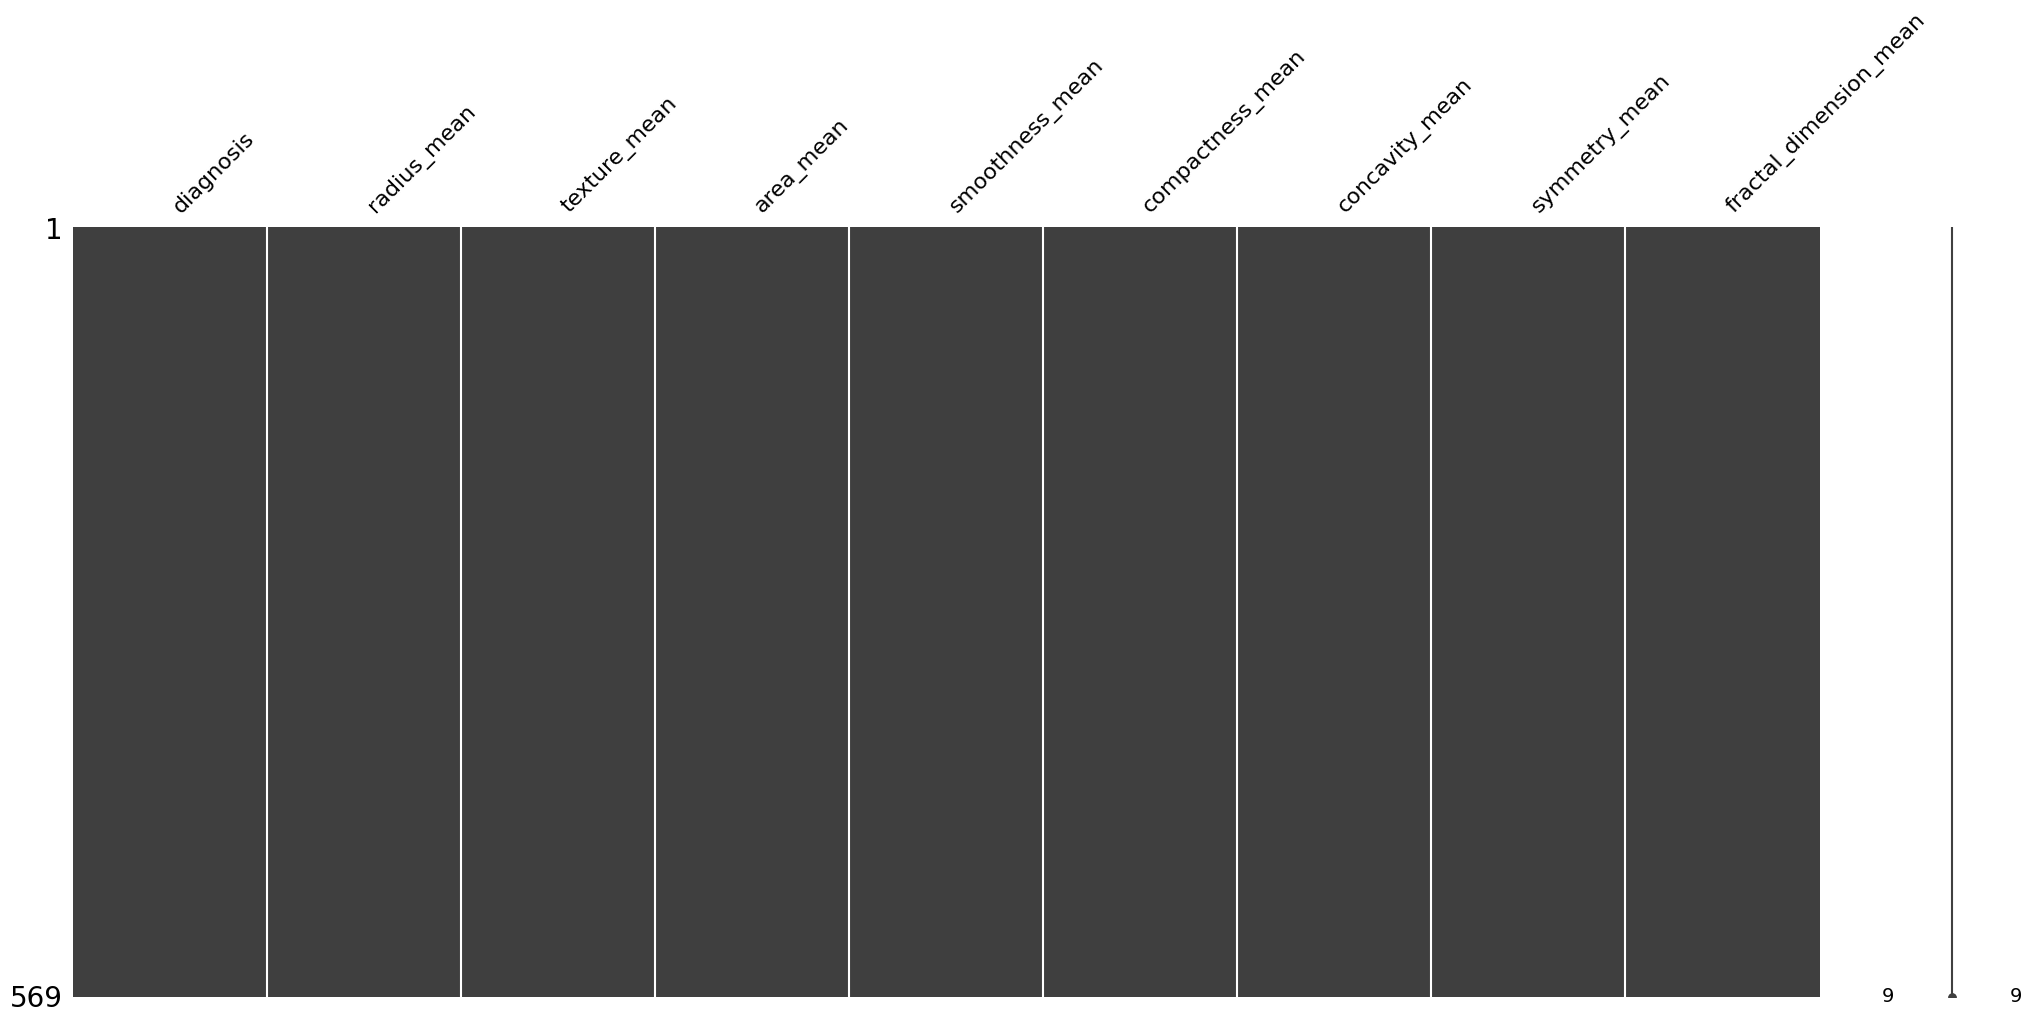

In [7]:
msno.matrix(df)

# EDA

In [8]:
# Estatísticas descritivas
df.describe()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798
std,0.483918,3.524049,4.301036,351.914129,0.014064,0.052813,0.079720,0.027414,0.007060
min,0.000000,6.981000,9.710000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,0.000000,13.370000,18.840000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,1.000000,15.780000,21.800000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120
max,1.000000,28.110000,39.280000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [9]:
# Verificando valores nulos
print(df.isnull().sum())

diagnosis                 0
radius_mean               0
texture_mean              0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


C:\Users\cacoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cacoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cacoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

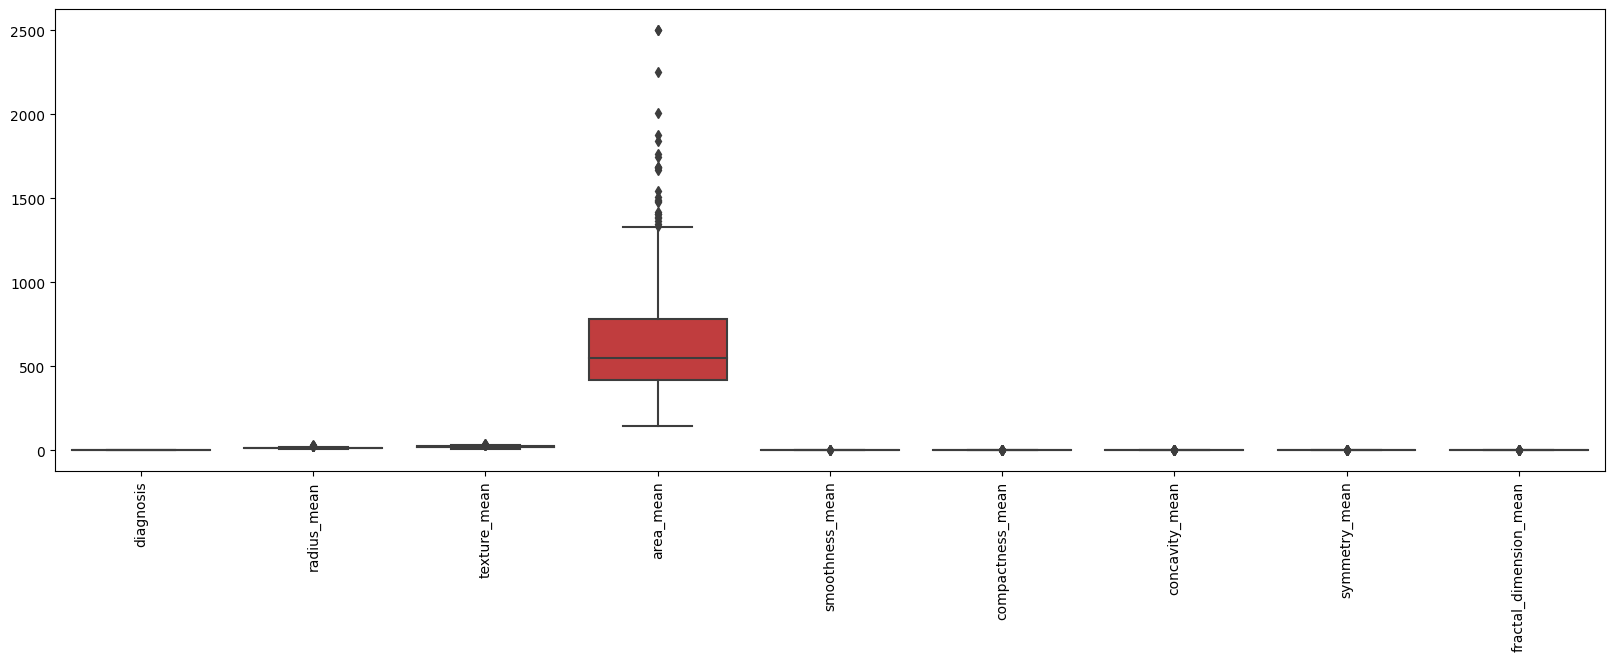

In [10]:
# Boxplot para todas as colunas
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [11]:
# Análise de outliers para todas as colunas
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).any(axis=1)
print(f"Número de outliers: {outliers.sum()}")

Número de outliers: 31


<Axes: >

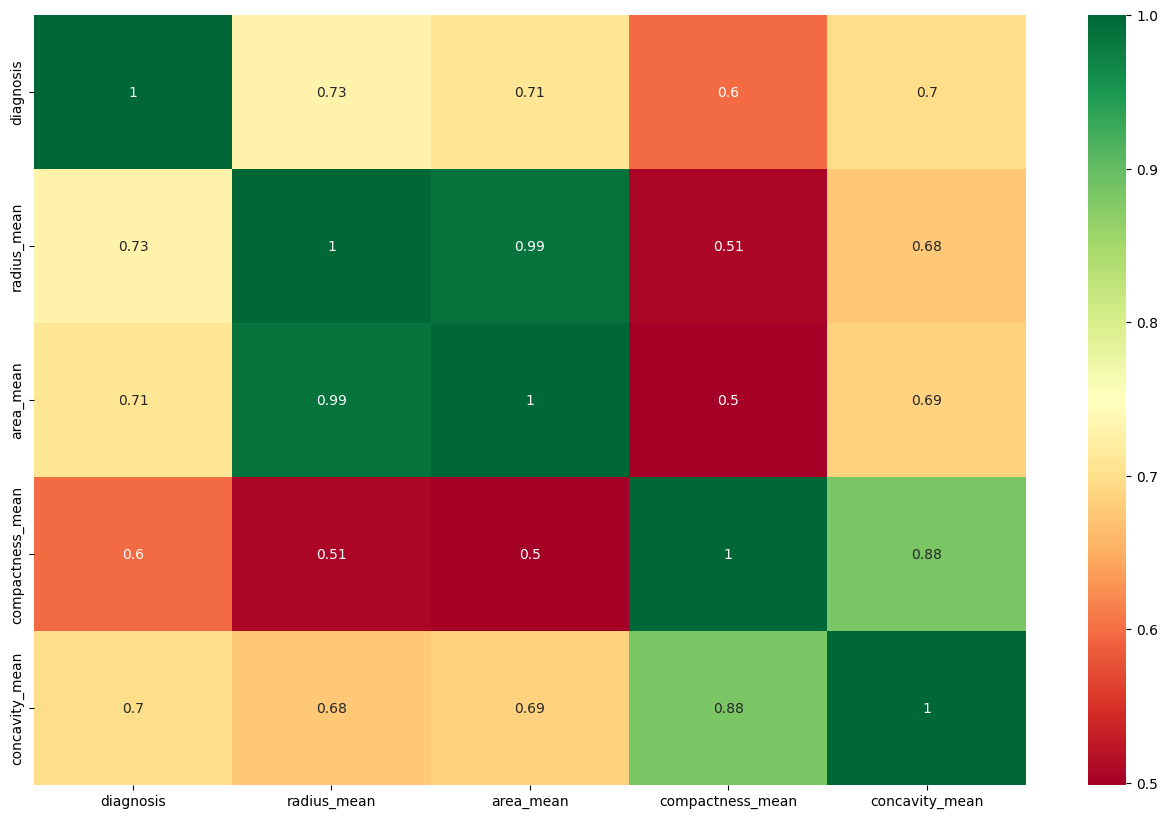

In [12]:
# Calculando a matriz de correlação
corr_matrix = df.corr()

# Selecionando as características com maior correlação
top_corr_features = corr_matrix.index[abs(corr_matrix["diagnosis"])>0.5]

# Plotando o heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

# Modeling


In [13]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializando o modelo
model = Sequential()

# Primeira camada oculta com 32 nós e a função de ativação relu
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(0.001)))

# Dropout para evitar overfitting
model.add(Dropout(0.5))

# Segunda camada oculta com 16 nós e a função de ativação relu
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))

# Dropout para evitar overfitting
model.add(Dropout(0.5))

# Camada de saída com 1 nó e a função de ativação sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo por 200 épocas
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50


15/15 [==============================] - 1s 1ms/step - loss: 0.8119 - accuracy: 0.6088
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.7415 - accuracy: 0.6967
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.7495
Epoch 4/50
15/15 [==============================] - 0s 893us/step - loss: 0.6511 - accuracy: 0.7626
Epoch 5/50
15/15 [==============================] - 0s 894us/step - loss: 0.6260 - accuracy: 0.7846
Epoch 6/50
15/15 [==============================] - 0s 859us/step - loss: 0.5712 - accuracy: 0.8176
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.8330
Epoch 8/50
15/15 [==============================] - 0s 893us/step - loss: 0.5190 - accuracy: 0.8396
Epoch 9/50
15/15 [==============================] - 0s 931us/step - loss: 0.5054 - accuracy: 0.8527
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.8571
Epoch 11/50
15/15 [=

# Evaluation

In [14]:
# Avaliando o modelo nos dados de teste
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9649
Loss: 0.19147303700447083
Accuracy: 0.9649122953414917


4/4 [==============================] - 0s 1ms/step


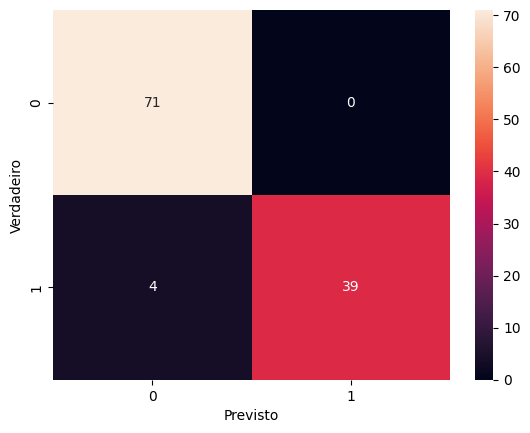

In [15]:
# Faça previsões nos dados de teste
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Gere a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualize a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


# Deploy

In [16]:
import pickle
filename = "..\model\model.pkl"
# Salvar o modelo
with open(filename, 'wb') as file:
    pickle.dump(model, file)